In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import sklearn 
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')


In [2]:
df = pd.read_csv("prepocessed_hypothyroid.csv")

In [3]:
df.head(10)

,age,sex,on thyroxine,TSH,T3 measured,T3,TT4,binaryClass
0,41.0,1.0,0,1.300000,1,2.5000,125.0,0
1,23.0,1.0,0,4.100000,1,2.0000,102.0,0
2,46.0,0.0,0,0.980000,0,2.0135,109.0,0
3,70.0,1.0,1,0.160000,1,1.9000,175.0,0
4,70.0,1.0,0,0.720000,1,1.2000,61.0,0
5,18.0,1.0,1,0.030000,0,2.0135,183.0,0
6,59.0,1.0,0,5.086766,0,2.0135,72.0,0
7,80.0,1.0,0,2.200000,1,0.6000,80.0,0
8,66.0,1.0,0,0.600000,1,2.2000,123.0,0
9,68.0,0.0,0,2.400000,1,1.6000,83.0,0


In [4]:
df.tail(10)

,age,sex,on thyroxine,TSH,T3 measured,T3,TT4,binaryClass
3762,61.0,0.0,0,5.086766,1,1.0000,72.000000,0
3763,41.0,1.0,0,5.086766,0,2.0135,108.319345,0
3764,54.0,0.0,0,1.200000,1,1.9000,89.000000,0
3765,73.0,1.0,1,8.500000,1,2.1000,104.000000,0
3766,19.0,1.0,0,8.800000,1,2.7000,108.000000,1
3767,30.0,1.0,0,5.086766,0,2.0135,108.319345,0
3768,68.0,1.0,0,1.000000,1,2.1000,124.000000,0
3769,74.0,1.0,0,5.100000,1,1.8000,112.000000,0
3770,72.0,0.0,0,0.700000,1,2.0000,82.000000,0
3771,64.0,1.0,0,1.000000,1,2.2000,99.000000,0


In [5]:
df.shape

(3772, 8)

In [6]:
df.isnull().sum()

age             0
sex             0
on thyroxine    0
TSH             0
T3 measured     0
T3              0
TT4             0
binaryClass     0
dtype: int64

In [7]:
df.describe()

,age,sex,on thyroxine,TSH,T3 measured,T3,TT4,binaryClass
count,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000,3772.000000
mean,51.735879,0.684705,0.123012,5.086766,0.796129,2.013500,108.319345,0.077147
std,20.082295,0.455362,0.328494,23.290853,0.402927,0.738262,34.496511,0.266861
min,1.000000,0.000000,0.000000,0.005000,0.000000,0.050000,2.000000,0.000000
25%,36.000000,0.000000,0.000000,0.600000,1.000000,1.700000,89.000000,0.000000
50%,54.000000,1.000000,0.000000,1.600000,1.000000,2.013500,106.000000,0.000000
75%,67.000000,1.000000,0.000000,3.800000,1.000000,2.200000,123.000000,0.000000
max,455.000000,1.000000,1.000000,530.000000,1.000000,10.600000,430.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3772 entries, 0 to 3771
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           3772 non-null   float64
 1   sex           3772 non-null   float64
 2   on thyroxine  3772 non-null   int64  
 3   TSH           3772 non-null   float64
 4   T3 measured   3772 non-null   int64  
 5   T3            3772 non-null   float64
 6   TT4           3772 non-null   float64
 7   binaryClass   3772 non-null   int64  
dtypes: float64(5), int64(3)
memory usage: 235.9 KB


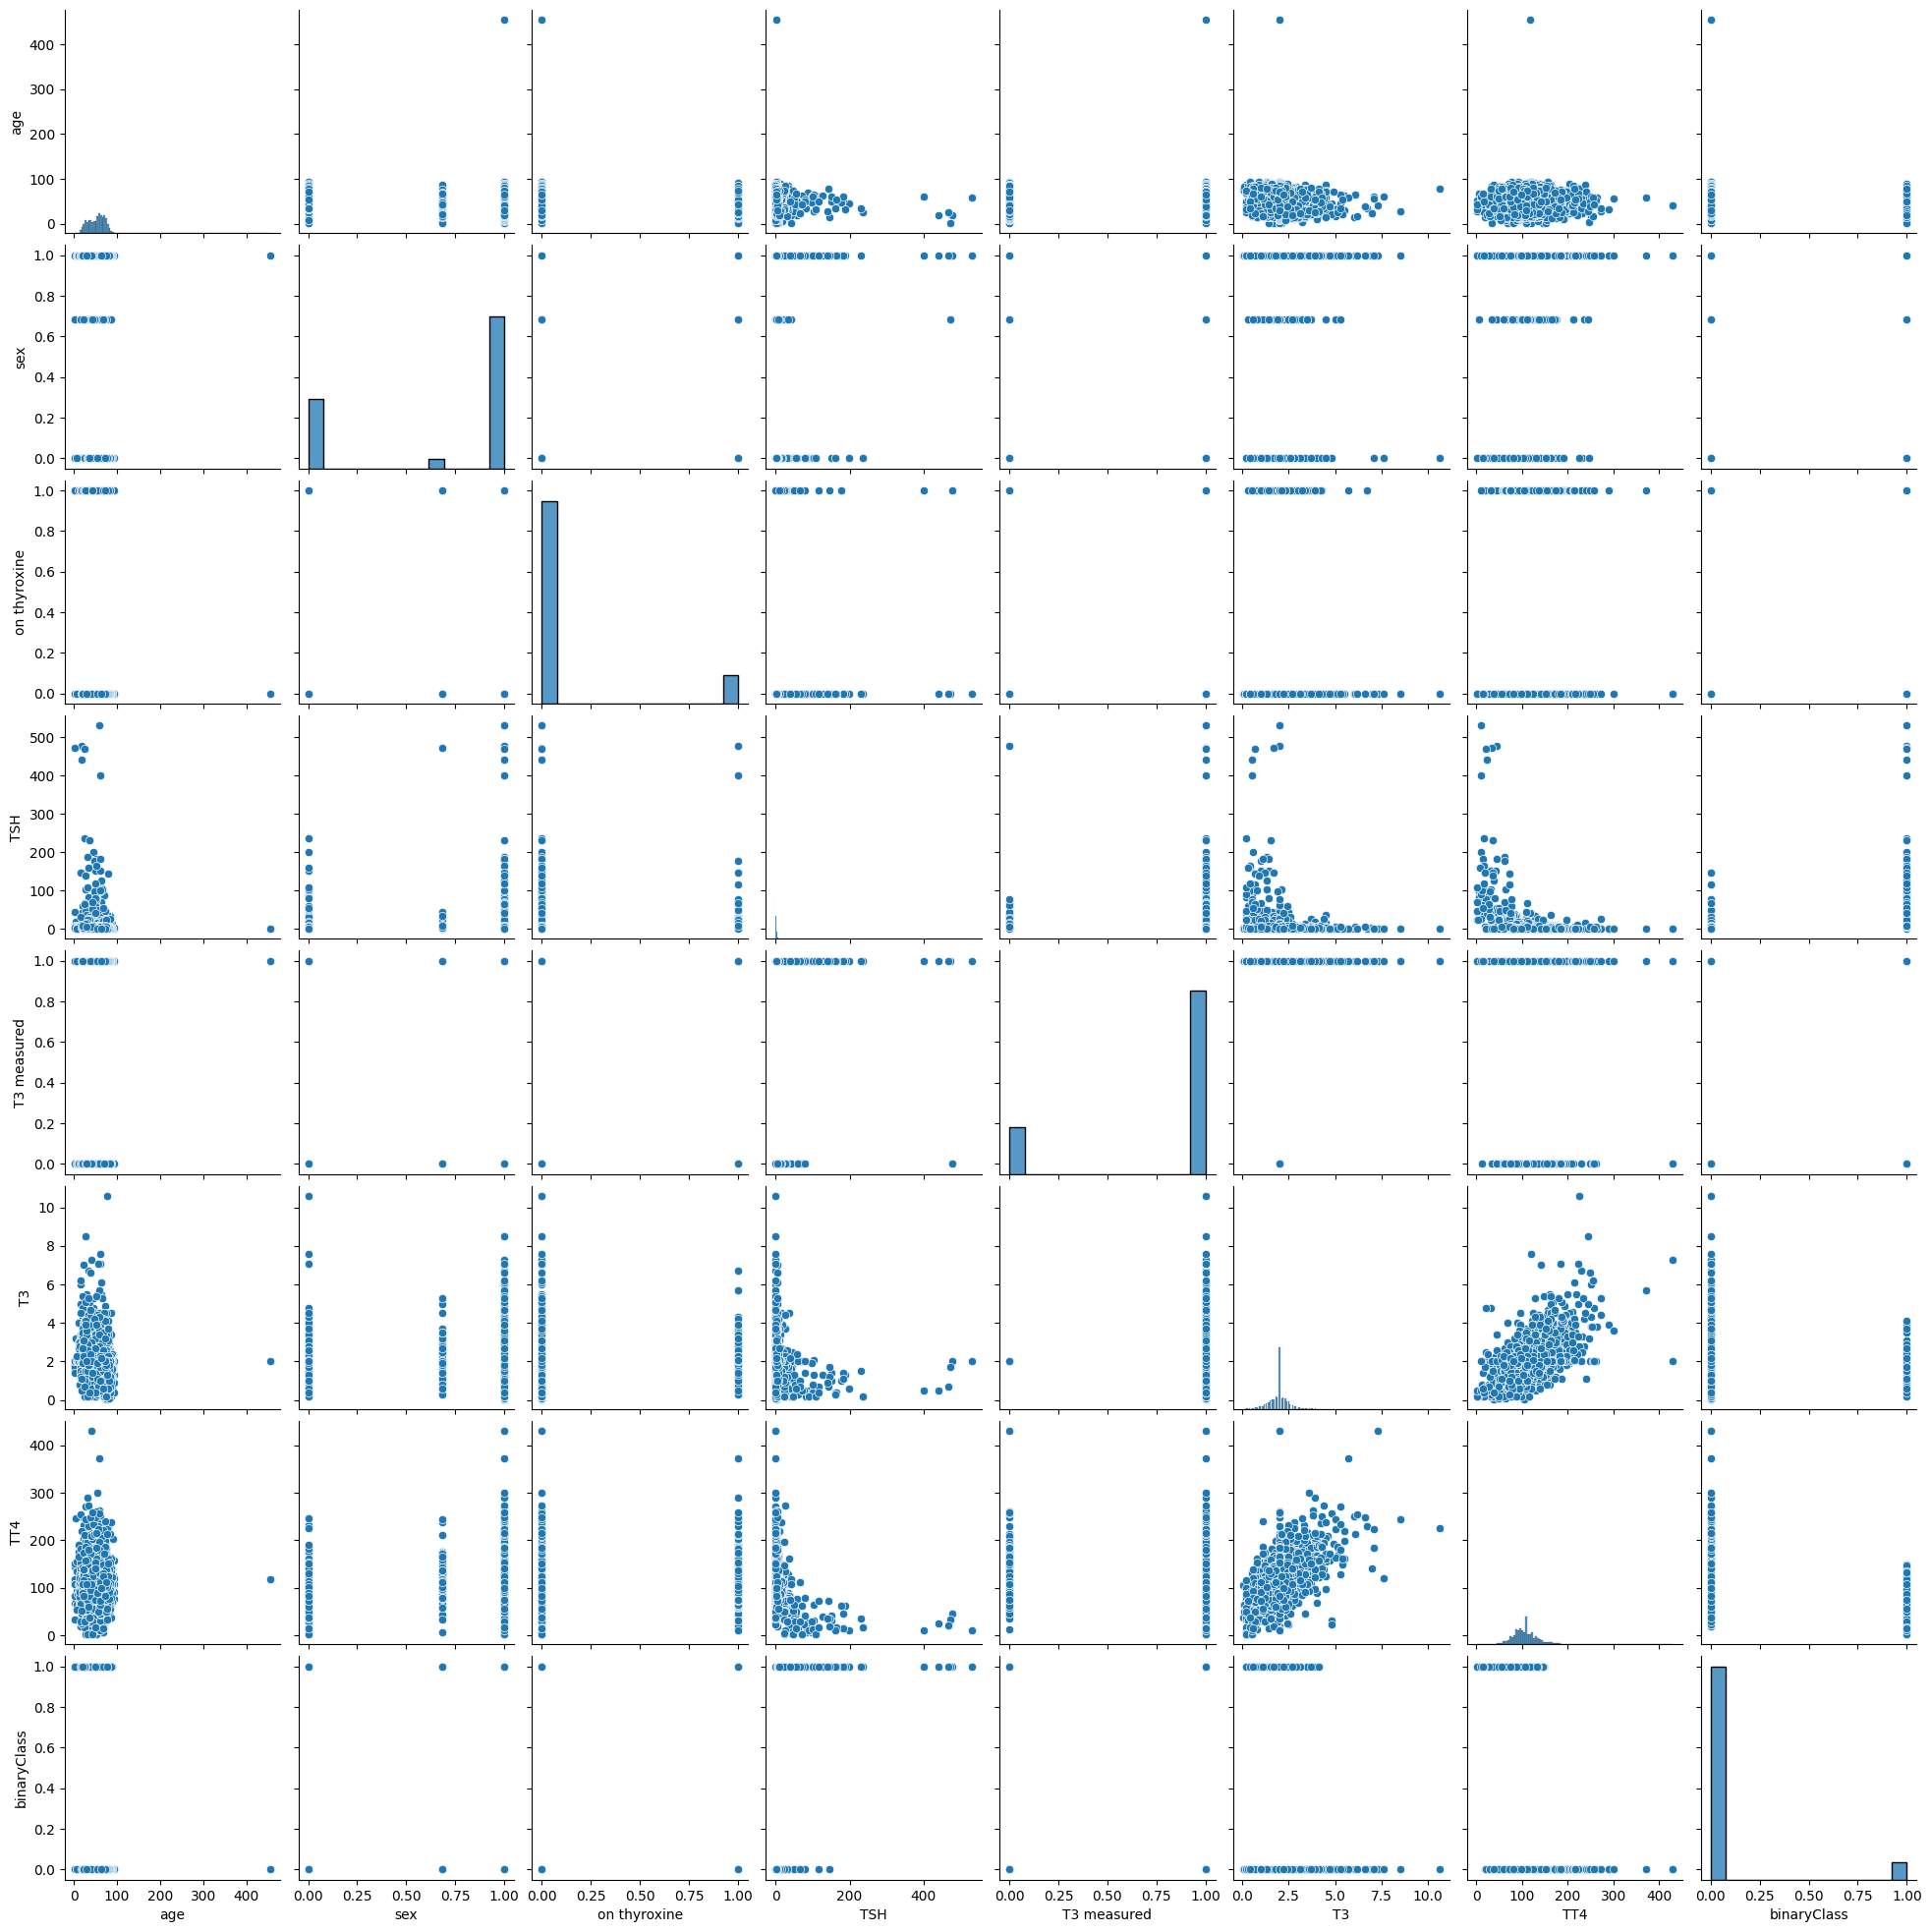

In [9]:
sns.pairplot(df,kind="scatter")

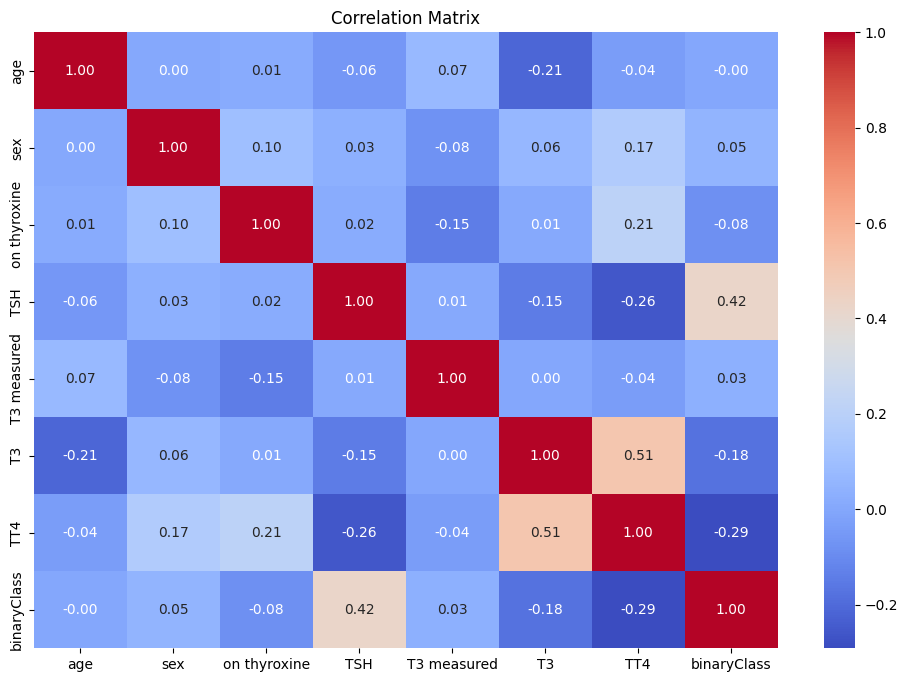

In [10]:
#checking the relation of different column with one another using correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [11]:
# independent and dependent variable
X = df.iloc[:,:-1]
y=df.iloc[:,-1]

In [12]:
# train test split 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42)


In [13]:
model_lr = LogisticRegression()
model_rf = RandomForestClassifier()
model_xgb = XGBClassifier()
model_knn = KNeighborsClassifier(n_neighbors=3)
model_dt = DecisionTreeClassifier()
model_sc = SVC()

In [14]:
parameter_lr = {
    "penalty":['l1','l2','elasticnet'],
          'C':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,2,3,4,5,6,7,8,9,10],
             'max_iter':[100,200,300]
}
parameter_rf ={
    "n_estimators":[50,100,150,200],
    "max_depth":[5,8,10],
    "min_samples_split":[2,4,6,8,10],
    "min_samples_leaf":[2,4,5],
    "max_features":['auto', 'sqrt', 'log2']
}

parameter_sc ={
    "C":[0.1,1,10],
    "kernel":["linear","rbf"],
    "gamma":["scale","auto"],
    "degree":[3,5]
}

parameter_xgb = {
    'n_estimators': [50, 100],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 6],
    'subsample': [0.7, 1.0],
    'colsample_bytree': [0.7, 1.0],
    'gamma': [0, 0.1]
}
parameter_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],  
    'weights': ['uniform', 'distance'], 
    'metric': ['minkowski', 'euclidean', 'manhattan']
}

parameter_dt ={
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4],  
    'criterion': ['gini', 'entropy']
}


In [15]:
classifier_regressor_lr=GridSearchCV(model_lr,param_grid=parameter_lr,scoring="accuracy",cv=5)
classifier_regressor_rf=GridSearchCV(model_rf,param_grid=parameter_rf,scoring="accuracy",cv=5)
classifier_regressor_xgb=GridSearchCV(model_xgb,param_grid=parameter_xgb,scoring="accuracy",cv=5)
classifier_regressor_dt=GridSearchCV(model_dt,param_grid=parameter_dt,scoring="accuracy",cv=5)
classifier_regressor_knn=GridSearchCV(model_knn,param_grid=parameter_knn,scoring="accuracy",cv=5)
classifier_regressor_sc=GridSearchCV(model_sc,param_grid=parameter_sc,scoring="accuracy",cv=5)

In [16]:
classifier_regressor_lr.fit(X_train,y_train)
classifier_regressor_sc.fit(X_train,y_train)
classifier_regressor_dt.fit(X_train,y_train)
classifier_regressor_knn.fit(X_train,y_train)
classifier_regressor_xgb.fit(X_train,y_train)
classifier_regressor_rf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 4, 5],
                         'min_samples_split': [2, 4, 6, 8, 10],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='accuracy')

In [17]:
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Logistic Regression:", classifier_regressor_lr.best_params_)
print("Best Score for Logistic Regression:", classifier_regressor_lr.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for RandomForestClassifer:", classifier_regressor_rf.best_params_)
print("Best Score for RandomForestClassifier:", classifier_regressor_rf.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for SVC:", classifier_regressor_sc.best_params_)
print("Best Score for SVC:", classifier_regressor_sc.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Xgboost:", classifier_regressor_xgb.best_params_)
print("Best Score for Xgboost:", classifier_regressor_xgb.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Knearestneighbour:", classifier_regressor_knn.best_params_)
print("Best Score for  Knearestneighbour:", classifier_regressor_knn.best_score_)
#analyzing the best parameter from the above given parameter and best score got from that parameter
print("Best Parameters for Decisiontreeclassifier:", classifier_regressor_dt.best_params_)
print("Best Score for Decisiontreeclassifier:", classifier_regressor_dt.best_score_)

Best Parameters for Logistic Regression: {'C': 10, 'max_iter': 100, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.9582863754338785
Best Parameters for RandomForestClassifer: {'max_depth': 8, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Best Score for RandomForestClassifier: 0.9950517527127177
Best Parameters for SVC: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'linear'}
Best Score for SVC: 0.9635886050220457
Best Parameters for Xgboost: {'colsample_bytree': 0.7, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 1.0}
Best Score for Xgboost: 0.9932849682604209
Best Parameters for Knearestneighbour: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Score for  Knearestneighbour: 0.9607630007192218
Best Parameters for Decisiontreeclassifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best Score for Decisiontreeclassifier: 0.99187028

In [18]:
y_pred_lr = classifier_regressor_lr.predict(X_test)
y_pred_rf = classifier_regressor_rf.predict(X_test)
y_pred_sc = classifier_regressor_sc.predict(X_test)
y_pred_knn = classifier_regressor_knn.predict(X_test)
y_pred_dt = classifier_regressor_dt.predict(X_test)
y_pred_xgb = classifier_regressor_xgb.predict(X_test)

In [19]:
score_lr = accuracy_score(y_pred_lr,y_test)
print("score of logistic regression: ",score_lr)
score_knn = accuracy_score(y_pred_knn,y_test)
print("score of kNearestNeigbour Classifierscore_knn:",score_knn)
score_sc = accuracy_score(y_pred_sc,y_test)
print("score of Support Vector Classfier:",score_sc)
score_dt = accuracy_score(y_pred_dt,y_test)
print("score of Decision Tree Classifier:",score_dt)
score_rf = accuracy_score(y_pred_rf,y_test)
print("score of RandomForest Classifier:",score_rf)
score_xgb = accuracy_score(y_pred_xgb,y_test)
print("score of XGBoost Classifier:",score_xgb)

score of logistic regression:  0.9650053022269353
score of kNearestNeigbour Classifierscore_knn: 0.9628844114528102
score of Support Vector Classfier: 0.9660657476139979
score of Decision Tree Classifier: 0.9936373276776246
score of RandomForest Classifier: 0.9946977730646872
score of XGBoost Classifier: 0.9957582184517497


In [20]:
#classification_report 
print("classification report of logistic regression")
print(classification_report(y_pred_lr,y_test))
print("Classification Report of Support Vector Classfier")
print(classification_report(y_pred_sc,y_test))
print("Classification Report of K NearestNeighbour Classifier")
print(classification_report(y_pred_knn,y_test))
print("Classification Report of XGBoost Classifier")
print(classification_report(y_pred_xgb,y_test))
print("Classification Report of RandomForest Classifier")
print(classification_report(y_pred_rf,y_test))
print("Classfication Report of Decision Tree Classifier")
print(classification_report(y_pred_dt,y_test))

classification report of logistic regression
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       905
           1       0.54      0.92      0.68        38

    accuracy                           0.97       943
   macro avg       0.77      0.94      0.83       943
weighted avg       0.98      0.97      0.97       943

Classification Report of Support Vector Classfier
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       902
           1       0.57      0.90      0.70        41

    accuracy                           0.97       943
   macro avg       0.78      0.94      0.84       943
weighted avg       0.98      0.97      0.97       943

Classification Report of K NearestNeighbour Classifier
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       893
           1       0.62      0.80      0.70        50

    accuracy                    

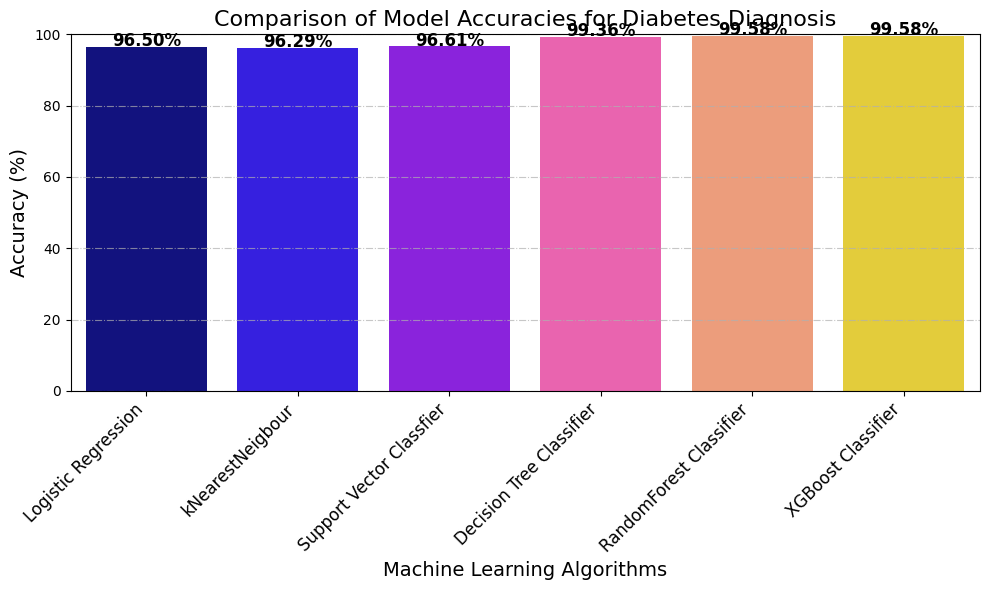

In [21]:
accuracy_results = {
    "Logistic Regression": 96.50053022269353,
    "kNearestNeigbour": 96.28844114528102,
    "Support Vector Classfier": 96.60657476139979,
    "Decision Tree Classifier": 99.36373276776246,
    "RandomForest Classifier": 99.57582184517497,
    "XGBoost Classifier": 99.57582184517497
}
# Set up the plot size
plt.figure(figsize=(10, 6))

# Create the barplot with a different color palette
sns.barplot(x=list(accuracy_results.keys()), y=list(accuracy_results.values()), palette="gnuplot2")

# Format the plot with labels and title
plt.xlabel("Machine Learning Algorithms", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.title("Comparison of Model Accuracies for Diabetes Diagnosis", fontsize=16)

# Rotate x-axis labels and adjust font size
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.ylim(0,100)
# Display the accuracy percentage on top of each bar
for index, value in enumerate(accuracy_results.values()):
    plt.text(index, value + 0.2, f"{value:.2f}%", ha='center', fontsize=12, fontweight='bold', color='black')

# Add grid lines to improve readability
plt.grid(axis='y', linestyle='-.', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [22]:
input_data = (44,0,0,45,1,1.4,39)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier_regressor_sc.predict(input_data_reshaped) #support vector machine is selected
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a HyperThyroid Disease')
else:
  print('The Person has HyperThyroid Disease')

[1]
The Person has HyperThyroid Disease


In [27]:
import pickle
filename = 'hyperthroid.sav'
pickle.dump(classifier_regressor_sc, open(filename, 'wb'))
# loading the saved model
loaded_model = pickle.load(open('hyperthroid.sav', 'rb'))